## Original emotions data workflow.

This is the raw workflow file with all the tools I built and used in my analysis of my emotions scores. 

In [1]:
import sqlite3

# module to handle interfacing with sql database

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# lets you get multiple outputs in a cell with multiple inputs 
# "pretty prints" outputs instead of having to use "print"

Below are a handful of tools I wrote to interact with the SQL database and to enter and update data into that datebase as well.

In [3]:

def open_connection(db):
    """opens connection to db"""
    conn = sqlite3.connect(db)
    c = conn.cursor()
    return c, conn

def close_connection(db):
    """
    closes connection to db
    """
    conn = sqlite3.connect(db)
    c = conn.cursor()
    c.close()
    conn.close()
    
def test_connection(db):
    """tests connection to database"""
    print(c)
    print(conn)

def create_table():
    """creates table if no table exists"""
    c.execute('create table if not exists emotions(datestamp text, angry real, sad real, happy real, fear real, unheard real, numb real, disgust real)')

    
def data_entry(c, new_data_row):
    """
    enters row into  table
    """
    c.execute("insert into emotions values{}".format(new_data_row))
    conn.commit()
    
    
    
def return_data(c):
    """
    tests data entry function
    returns whole table for now
    """
    c.execute("select * from emotions")
    data = c.fetchall()
    
    return data
    

In [4]:
def data_capture():
    """
    tool to enter data
    
    no vowels in the variables to match emotions
    
    datestamp is datestamp
    ngry is angry
    sd is sad
    hppy is happy
    fr is fear
    nhrd is unheard
    nmb is numb
    dsgst is disgust
    
    returns a row of data
    """
    
    datestamp = input('enter datestamp: ')
    ngry = input('enter angry: ')
    sd = input('enter sad: ')
    hppy = input('enter happy: ')
    fr = input('enter fear: ')
    nhrd = input('enter unheard: ')
    nmb = input('enter numb: ')
    dsgst = input('enter disgust: ')
    
    data_row = "('{}',{},{},{},{},{},{},{});".format(datestamp, ngry, sd, hppy, fr, nhrd, nmb, dsgst)
    
    return data_row


The tool in the cell above uses Python's `input()` function to collect data right inside the notebook. It asks for an input on every emotion and if any entries are left empty, it comes back with an error and the row has to be entered once again.

The next iteration of the tool would probably be to test if the inputs are all numbers.

In [117]:
# data capture initiates the tool from above and the data entry function takes 
# the input data and updates the SQL databse with a new record
new_row = data_capture()
data_entry(new_row)

enter datestamp: 09262019
enter angry: 3.5
enter sad: 3.5
enter happy: 0
enter fear: 5.5
enter unheard: 0
enter numb: 0
enter disgust: 0


Below I use a Python data science library called Pandas to explore the data for quick insights and then update the date column since it was not entered in a computer readable format.

In [4]:
import pandas as pd

In [5]:
# connects to database and initiates data to a Pandas' object, called a DataFrame.

c, conn = open_connection('test_0.db')
cols = ['datestamp', 'A', 'S', 'H', 'F', 'U', 'N', 'D']
df = pd.DataFrame(return_data(c), columns=cols)

In [6]:
df # normally I don't preview all of the data but since there are only 70 rows

,datestamp,A,S,H,F,U,N,D
0,02011991,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,09142019,1.0,6.0,3.0,4.0,0.0,0.0,0.0
2,09152019,6.0,6.0,0.0,3.0,0.0,0.0,0.0
3,09152019,1.0,1.0,5.5,5.0,0.0,0.0,0.0
4,09142019,5.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
67,04162020,1.0,2.0,2.0,1.0,1.0,2.0,3.0
68,05032020,0.0,0.0,6.0,3.0,1.0,5.0,1.0
69,05062020,0.0,0.0,3.0,1.0,1.0,0.0,0.0
70,05072020,2.0,1.0,6.0,1.0,2.0,0.0,1.0


Below I wrote a tool to iteratively return specific statistics about specific columns in the dataset.

In [74]:
def return_basic_stats(col):
    """will return pd.series.describe information"""
    return col.describe()

basic_stats_list = [return_basic_stats(df[i]) for i in cols[1:]]

stat_key = {
    'mean' : 1,
    'std' : 2,
    'min' : 3,
    '25%' : 4,
    '50%' : 5,
    '75%' : 6,
    'max' : 7
}

basic_stats_list[6]

basic_stats_list[0][7]

count    72.000000
mean      1.416667
std       1.655124
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       7.500000
Name: D, dtype: float64

9.5

Let's see what my average emotions are

In [96]:
emos = ['angry', 'sad', 'happy', 'fear', 'unheard', 'numb', 'disgust']

def return_measure_scores(measure):
    """returns specifie measure scores for each emotion"""
    mean_scores = [i[measure] for i in basic_stats_list]

    score_set = {emos[i]: mean_scores[i] for i in range(len(emos))} 
    
    return pd.Series(score_set)

In [97]:
return_measure_scores(stat_key['max'])
return_measure_scores(stat_key['mean'])
return_measure_scores(stat_key['min'])

angry      9.5
sad        8.5
happy      8.0
fear       8.5
unheard    7.0
numb       9.0
disgust    7.5
dtype: float64

angry      2.055556
sad        2.520833
happy      3.951389
fear       2.770833
unheard    1.680556
numb       0.979167
disgust    1.416667
dtype: float64

angry      0.0
sad        0.0
happy      0.0
fear       0.0
unheard    0.0
numb       0.0
disgust    0.0
dtype: float64

Below is where I build a tool to reformat the date so a computer can understand it and then be able to use that data. The format I entered the dates in is one I use in my own workflows.

In [7]:
from datetime import datetime # datetime module for handling dates in Python

In [8]:
test_date_string = df['datestamp'][0]

def date_string_to_date_obj(d_string):
    mnth = d_string[:2]
    dy = d_string[2:4]
    yr = d_string[4:]
    
    string_to_be_processed = (mnth + '-' + dy + '-' + yr)
    
    date_obj = datetime.strptime(string_to_be_processed, '%m-%d-%Y')
    
    return str(date_obj)
    
date_string_to_date_obj(test_date_string)

'1991-02-01 00:00:00'

In [12]:
df_temp = df # copying as to not mess up the original.

In [13]:
cleaned_data_set = df_temp.drop([17,62])
cleaned_data_set

# dropping rows that had bad data in them.

,datestamp,A,S,H,F,U,N,D
0,02011991,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,09142019,1.0,6.0,3.0,4.0,0.0,0.0,0.0
2,09152019,6.0,6.0,0.0,3.0,0.0,0.0,0.0
3,09152019,1.0,1.0,5.5,5.0,0.0,0.0,0.0
4,09142019,5.0,0.0,1.0,0.0,0.0,0.0,0.0
5,09162019,2.0,6.0,3.0,3.0,0.0,0.0,0.0
6,09172019,9.5,8.5,0.0,8.5,0.0,0.0,0.0
7,09192019,5.0,7.0,4.0,6.0,0.0,0.0,0.0
8,09192019,1.0,2.0,3.0,1.0,0.0,0.0,0.0
9,09192019,0.5,4.5,4.5,2.5,1.5,2.5,4.0


In [10]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [14]:
cleaned_data_set['date'] = cleaned_data_set['datestamp'].apply(date_string_to_date_obj)
cleaned_data_set = cleaned_data_set.drop('datestamp', axis=1)
cleaned_data_set

# reformatted date column

,A,S,H,F,U,N,D,date
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1991-02-01 00:00:00
1,1.0,6.0,3.0,4.0,0.0,0.0,0.0,2019-09-14 00:00:00
2,6.0,6.0,0.0,3.0,0.0,0.0,0.0,2019-09-15 00:00:00
3,1.0,1.0,5.5,5.0,0.0,0.0,0.0,2019-09-15 00:00:00
4,5.0,0.0,1.0,0.0,0.0,0.0,0.0,2019-09-14 00:00:00
5,2.0,6.0,3.0,3.0,0.0,0.0,0.0,2019-09-16 00:00:00
6,9.5,8.5,0.0,8.5,0.0,0.0,0.0,2019-09-17 00:00:00
7,5.0,7.0,4.0,6.0,0.0,0.0,0.0,2019-09-19 00:00:00
8,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2019-09-19 00:00:00
9,0.5,4.5,4.5,2.5,1.5,2.5,4.0,2019-09-19 00:00:00


In [15]:
cleaned_data_set.to_csv('cleaned_emotions_dataset.csv', index=False)

# exporting data to a csv

In [16]:
ls # checking to see if it exported correctly

cleaned_emotions_dataset.csv  README.md         test_0.db
cover_letter                  README.md.backup  test.db
emotions.csv                  test_01.db        Untitled.ipynb


Below I reload the cleaned data to test that it is the newly reformatted and clean dataset.

In [3]:
test_load = pd.read_csv('cleaned_emotions_dataset.csv')
test_load

,A,S,H,F,U,N,D,date
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1991-02-01 00:00:00
1,1.0,6.0,3.0,4.0,0.0,0.0,0.0,2019-09-14 00:00:00
2,6.0,6.0,0.0,3.0,0.0,0.0,0.0,2019-09-15 00:00:00
3,1.0,1.0,5.5,5.0,0.0,0.0,0.0,2019-09-15 00:00:00
4,5.0,0.0,1.0,0.0,0.0,0.0,0.0,2019-09-14 00:00:00
...,...,...,...,...,...,...,...,...
65,1.0,2.0,2.0,1.0,1.0,2.0,3.0,2020-04-16 00:00:00
66,0.0,0.0,6.0,3.0,1.0,5.0,1.0,2020-05-03 00:00:00
67,0.0,0.0,3.0,1.0,1.0,0.0,0.0,2020-05-06 00:00:00
68,2.0,1.0,6.0,1.0,2.0,0.0,1.0,2020-05-07 00:00:00


I was interested in building a tool to produce a scatterplot plooting each emotion against another to find any kind of correlations.

I import matplotlib, a Python plotting and graphing module and then get to work on building a tool to compare two emotions and afterwards, building a function that I can run iteratively and it produce a plot for each emotion against one specified emotion.

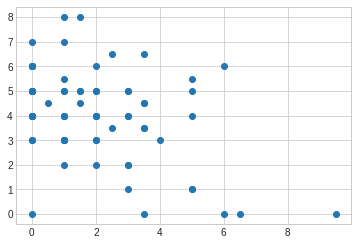

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

x, y = test_load['A'], test_load['H']

plt.scatter(x,y)


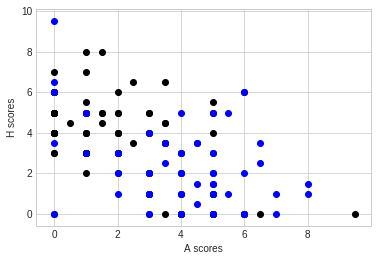

In [99]:
def compare_against_scatter_plot(a,b,data):
    """takes two series and compares them
    against each other on a scatter plot"""
    cc = np.arange(len(a))
    plt.style.use('seaborn-whitegrid')
    x,y = data[a], data[b]
    plt.scatter(x,y,c='black')
    plt.scatter(y,x,c='blue')
    plt.xlabel(a + ' scores')
    plt.ylabel(b + ' scores')
    plt.show()
    
compare_against_scatter_plot('A','H', test_load) # anger and happy

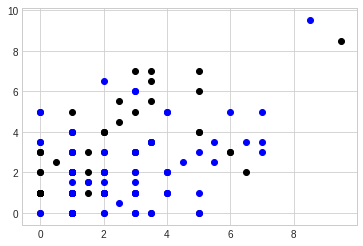

In [82]:
compare_against_scatter_plot('A','F', test_load) # anger and fear

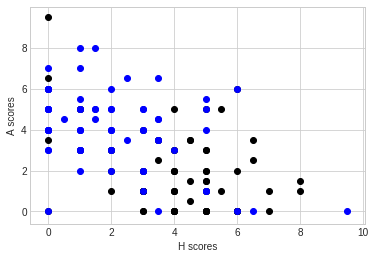

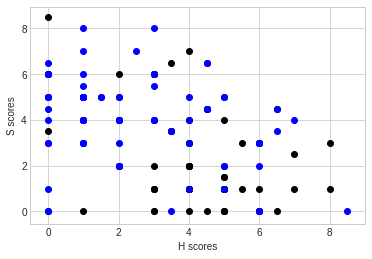

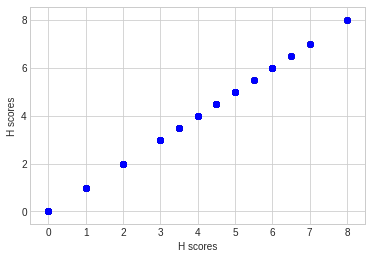

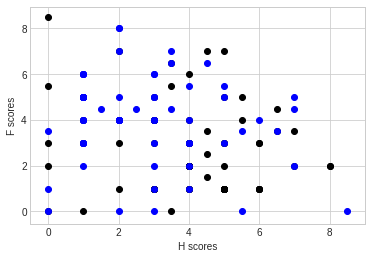

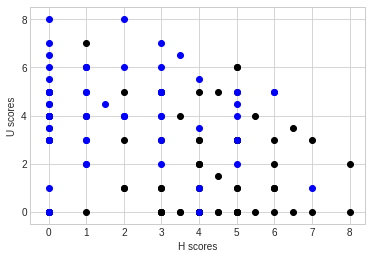

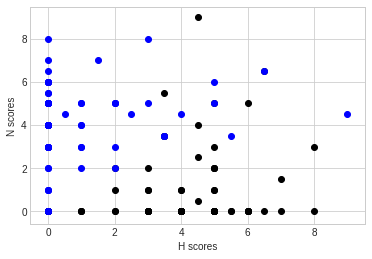

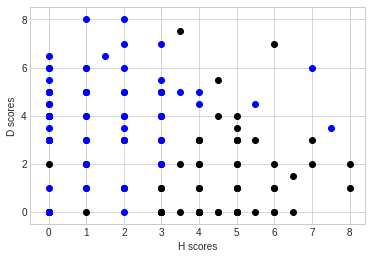

In [109]:
cols_list = list(test_load.columns)
temp_cols_list = cols_list[:-1]


for i in range(len(temp_cols_list)):
    compare_against_scatter_plot(temp_cols_list[2],temp_cols_list[i], test_load)
    
# after building the function to make one graph, I run it inside a for loop to print
# all emotion scatter plots

Below are sources I could not have done this analysis without.

sources:

[sqlitetutorial dot net](https://www.sqlitetutorial.net/sqlite-python/)

[sentdex sqlite3 tut](https://youtu.be/qfGu0fBfNBs?list=PLQVvvaa0QuDezJh0sC5CqXLKZTSKU1YNo)

[pyformat for great good](https://pyformat.info/)

[sqlite tut stack abuse](https://stackabuse.com/a-sqlite-tutorial-with-python/)

[date formatting](https://stackabuse.com/how-to-format-dates-in-python/)

[dropping rows in pandas](https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/)

[matplotlib scatter plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html)

[building multiple graphs](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)

